In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/DELL/Downloads/Stores.csv')

# Display the first few rows of the dataset
print(df.head())


   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620


In [2]:
high_sales = df[df['Store_Sales'] > 60000]
print(high_sales)

     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0            1        1659             1961                   530        66490
6            7        1542             1858                  1030        72240
10          11        1187             1439                  1090        71280
12          13        1746             2064                  1050        60470
14          15        1469             1756                   770        66360
..         ...         ...              ...                   ...          ...
890        891        1549             1851                  1220        70620
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610

[421 rows x 5 columns]


In [3]:
sorted_df = df.sort_values(by='Store_Sales', ascending=False)
print(sorted_df)


     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
649        650        1989             2414                   860       116320
868        869        1775             2104                   980       105150
432        433        1365             1638                   680       102920
408        409        1303             1587                  1310       102310
758        759        1486             1758                   820       101820
..         ...         ...              ...                   ...          ...
352        353        1397             1686                   850        21300
593        594        1624             1946                   870        20270
775        776        1537             1877                   660        17670
852        853        1477             1790                   880        16370
31          32        1250             1508                   990        14920

[896 rows x 5 columns]


In [4]:
# Define bins for Store_Area
bins = [0, 2000, 3000, 4000, 5000]
labels = ['0-2000', '2000-3000', '3000-4000', '4000-5000']

# Create a new column for Store_Area range
df['Store_Area_Range'] = pd.cut(df['Store_Area'], bins=bins, labels=labels)

# Group by Store_Area_Range and calculate mean Store_Sales
sales_by_area = df.groupby('Store_Area_Range')['Store_Sales'].mean().reset_index()
print(sales_by_area)


  Store_Area_Range   Store_Sales
0           0-2000  59199.089875
1        2000-3000  67221.764706
2        3000-4000           NaN
3        4000-5000           NaN


In [5]:
mean_sales = df['Store_Sales'].mean()
median_sales = df['Store_Sales'].median()
std_sales = df['Store_Sales'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Mean Sales: 59351.30580357143
Median Sales: 58605.0
Standard Deviation of Sales: 17190.741894878294


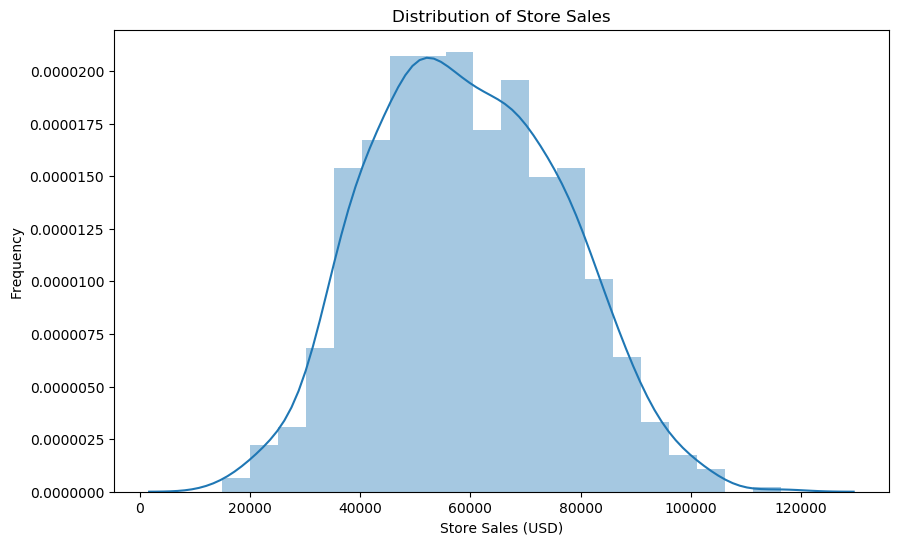

In [8]:
#Histogram of store sales
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.distplot(df['Store_Sales'], bins=20, kde=True)
plt.title('Distribution of Store Sales')
plt.xlabel('Store Sales (USD)')
plt.ylabel('Frequency')
plt.show()


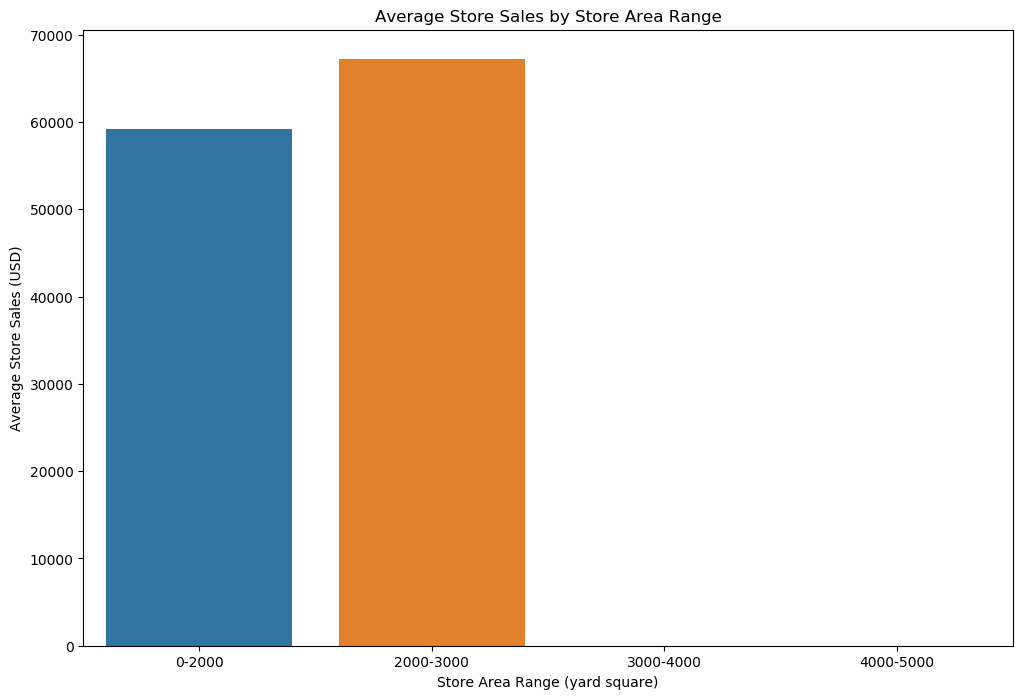

In [9]:
#Sales by Store Area Range
plt.figure(figsize=(12, 8))
sns.barplot(x='Store_Area_Range', y='Store_Sales', data=sales_by_area)
plt.title('Average Store Sales by Store Area Range')
plt.xlabel('Store Area Range (yard square)')
plt.ylabel('Average Store Sales (USD)')
plt.show()
